In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de datos 

In [2]:
df = pd.read_csv('sampled_data_25k.csv')

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour
0,2019-11-01 16:29:07+00:00,view,2500962,2053013564003713919,appliances.kitchen.oven,electrolux,463.20,516216750,026c0439-7540-4963-aba7-e753bd2a4ad3,16
1,2019-11-02 13:26:31+00:00,view,9600155,2053013561185141473,NaN,dji,468.19,512783488,080c2e91-e335-4a89-a889-0a5a619f9051,13
2,2019-11-01 17:49:29+00:00,view,14700670,2053013557133443581,furniture.living_room.cabinet,sv,123.53,513741357,a7685abc-71cf-45b3-9870-d344847fba0f,17
3,2019-11-01 14:50:45+00:00,view,3600145,2053013563810775923,appliances.kitchen.washer,indesit,169.63,530256322,a5ed5609-800d-4e95-a631-dd86d2da2b98,14
4,2019-11-02 08:18:23+00:00,view,18000258,2053013558525952589,NaN,samsung,6.41,512777444,ae2564fd-5166-4216-8914-77b16b0bae45,8


In [5]:
#verificar cantidad de valores nulos 

nulos = df.isnull().sum()
print('la cantidad de valores nulos es de:\n',nulos)

#verificar cantidad de valores duplicados

duplicados = df.duplicated().sum()
print('la cantidad de valores duplicados es de: ',duplicados)

la cantidad de valores nulos es de:
 event_time          0
event_type          0
product_id          0
category_id         0
category_code    8116
brand            3665
price               0
user_id             0
user_session        0
hour                0
dtype: int64
la cantidad de valores duplicados es de:  0


In [6]:
# Rellenar los nulos en 'category_code' y 'brand' con 'desconocido'
df['category_code'].fillna('desconocido', inplace=True)
df['brand'].fillna('desconocido', inplace=True)

# Verificar los cambios
print(df.isnull().sum())

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
hour             0
dtype: int64


# EDA

In [7]:
# 1. Resumen estadístico inicial
print("Resumen estadístico de las variables numéricas:")
print(df.describe())

print("\nResumen de las variables categóricas:")
print(df.describe(include=['object']))

Resumen estadístico de las variables numéricas:
         product_id   category_id         price       user_id          hour
count  2.500000e+04  2.500000e+04  25000.000000  2.500000e+04  25000.000000
mean   1.085296e+07  2.057565e+18    292.187723  5.355209e+08     11.434680
std    1.210697e+07  1.886925e+16    349.789351  2.022060e+07      5.364193
min    1.002098e+06  2.053014e+18      0.000000  3.988438e+08      0.000000
25%    1.005217e+06  2.053014e+18     69.500000  5.159800e+08      7.000000
50%    5.100562e+06  2.053014e+18    170.120000  5.311399e+08     12.000000
75%    1.610025e+07  2.053014e+18    361.970000  5.552316e+08     16.000000
max    6.170001e+07  2.175420e+18   2574.070000  5.669487e+08     23.000000

Resumen de las variables categóricas:
                       event_time event_type category_code        brand  \
count                       25000      25000         25000        25000   
unique                      22893          3           117         1253   
top 

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


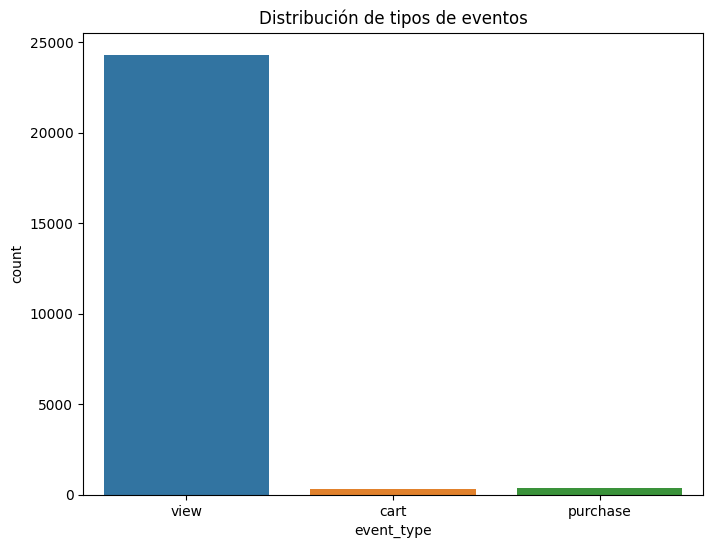

In [8]:
# 2. Distribución de los tipos de eventos
plt.figure(figsize=(8,6))
sns.countplot(x='event_type', data=df)
plt.title('Distribución de tipos de eventos')
plt.show()

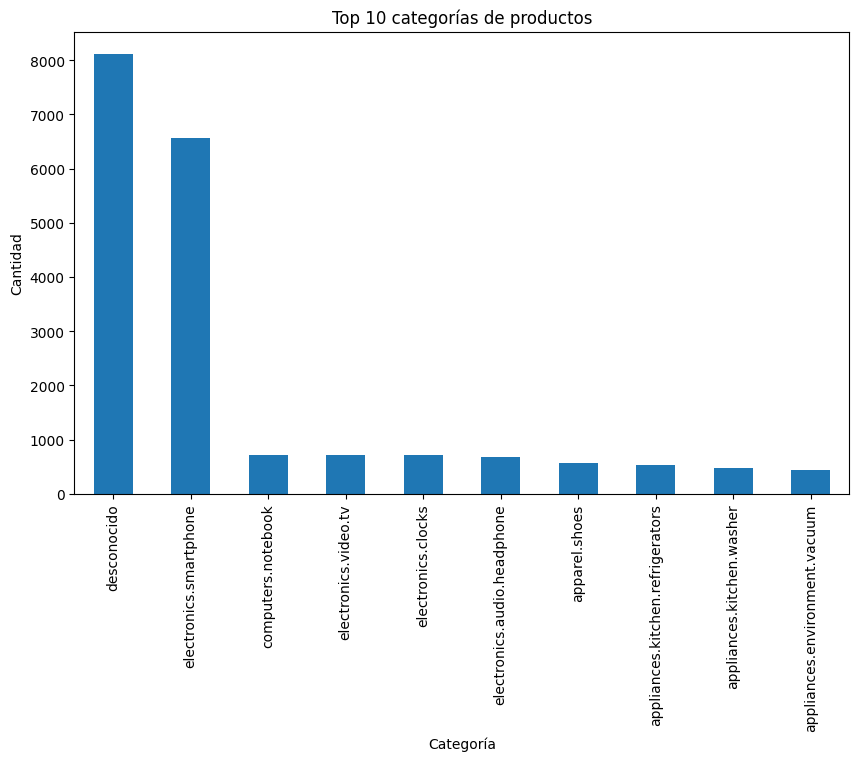

In [9]:
# 3. Distribución de las categorías de productos
plt.figure(figsize=(10,6))
df['category_code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 categorías de productos')
plt.ylabel('Cantidad')
plt.xlabel('Categoría')
plt.show()

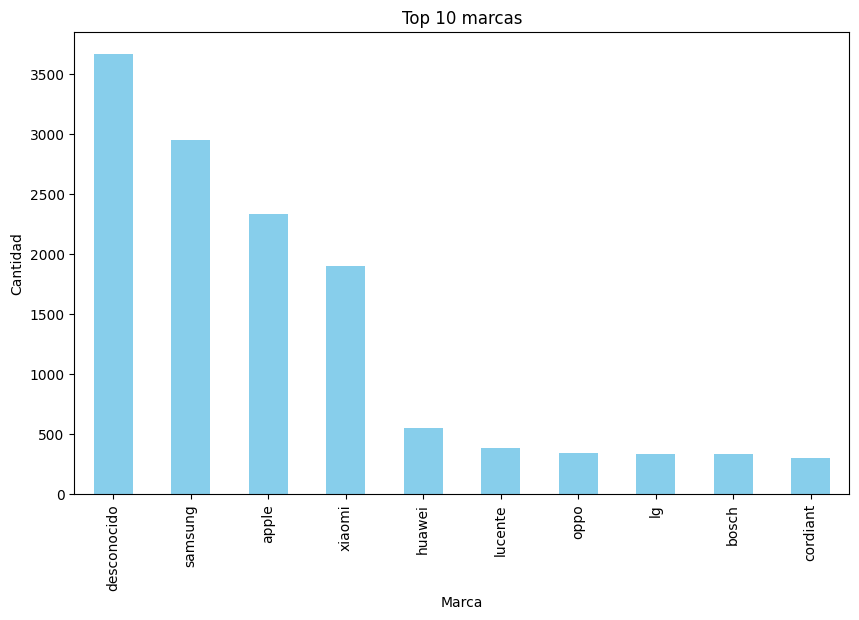

In [10]:
# 4. Distribución de marcas (top 10)
plt.figure(figsize=(10,6))
df['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 marcas')
plt.ylabel('Cantidad')
plt.xlabel('Marca')
plt.show()


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


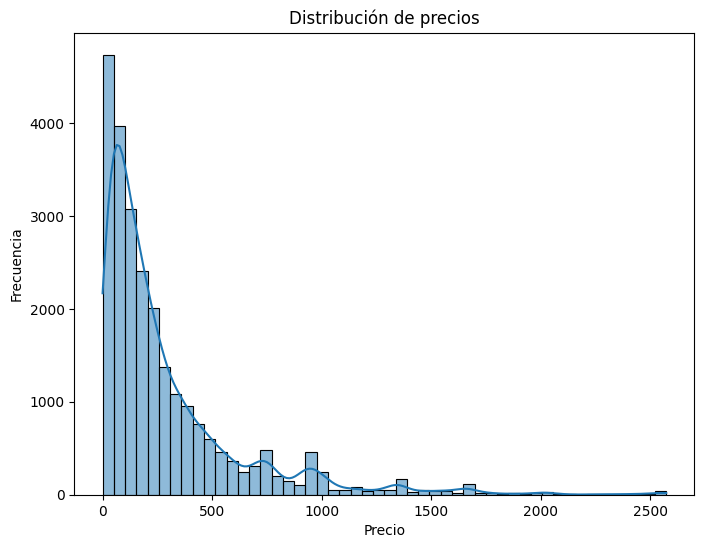

In [11]:
# 5. Distribución de los precios
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


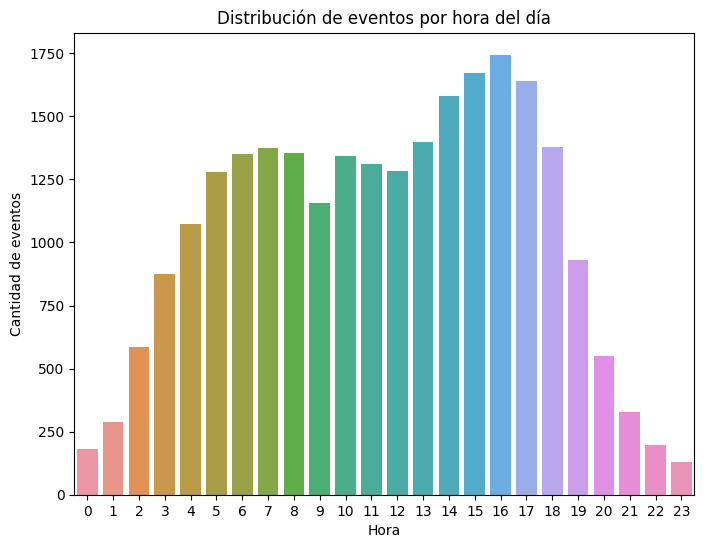

In [12]:
# 6. Análisis de eventos a lo largo del día (columna 'hour')
plt.figure(figsize=(8,6))
sns.countplot(x='hour', data=df)
plt.title('Distribución de eventos por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de eventos')
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


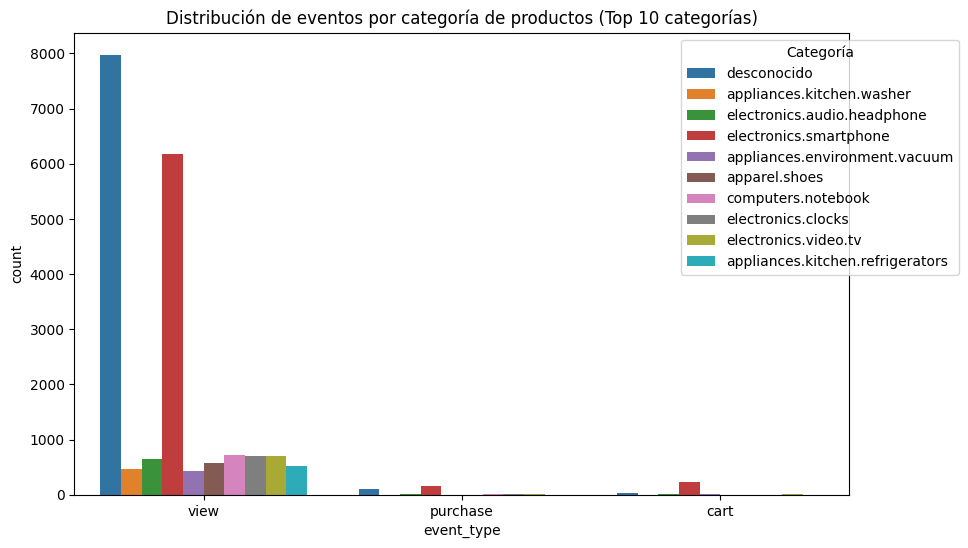

In [17]:
# 7. Eventos por categoría de producto
# Obtener las 10 categorías más frecuentes
top_10_categorias = df['category_code'].value_counts().index[:10]

# Filtrar el DataFrame para incluir solo las top 10 categorías
df_top_10_categorias = df[df['category_code'].isin(top_10_categorias)]

# Crear el gráfico de barras con las top 10 categorías
plt.figure(figsize=(10,6))
sns.countplot(x='event_type', hue='category_code', data=df_top_10_categorias, order=df['event_type'].value_counts().index)
plt.title('Distribución de eventos por categoría de productos (Top 10 categorías)')
plt.legend(title='Categoría', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


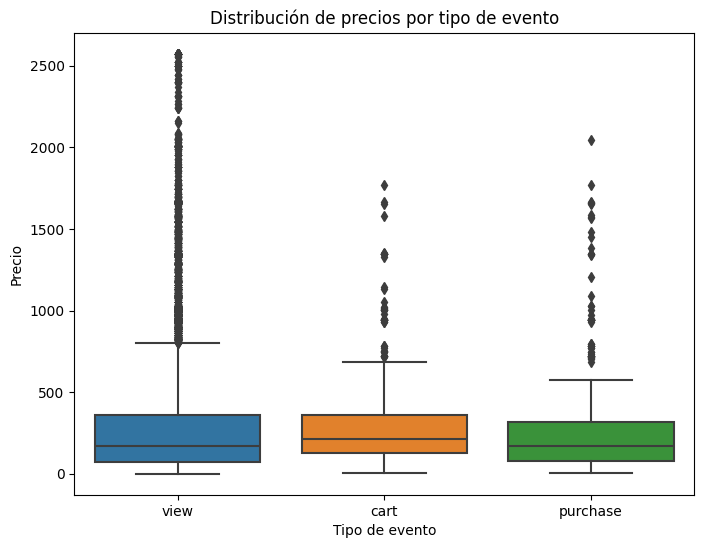

In [14]:
# 8. Relación entre precio y eventos
plt.figure(figsize=(8,6))
sns.boxplot(x='event_type', y='price', data=df)
plt.title('Distribución de precios por tipo de evento')
plt.xlabel('Tipo de evento')
plt.ylabel('Precio')
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


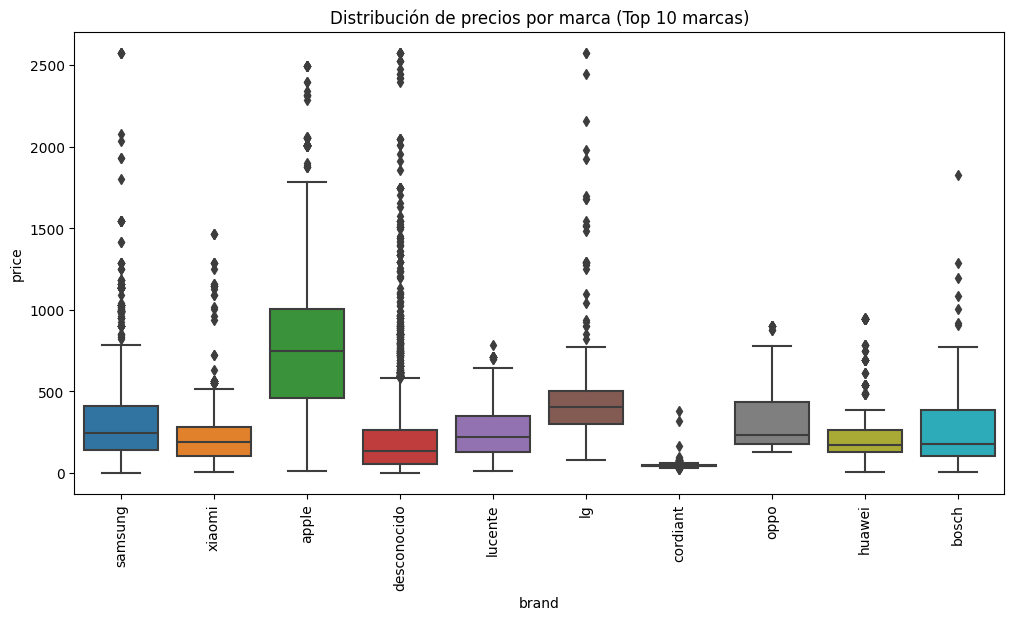

In [16]:
# 9. Relación entre precios y marcas
# Obtener las 10 marcas más frecuentes
top_10_marcas = df['brand'].value_counts().index[:10]

# Filtrar el DataFrame para incluir solo las top 10 marcas
df_top_10_marcas = df[df['brand'].isin(top_10_marcas)]

# Crear el gráfico de caja con las top 10 marcas
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='price', data=df_top_10_marcas)
plt.title('Distribución de precios por marca (Top 10 marcas)')
plt.xticks(rotation=90)
plt.show()